<h1>Zero Order Hold Convolution</h1>

The Image Array
  [[157 157 157 ... 157 157 157]
 [157 157 157 ... 157 157 157]
 [157 157 157 ... 157 157 157]
 ...
 [116 116 117 ... 155 131 134]
 [116 116 116 ... 137 134 130]
 [115 115 115 ...  66 160 169]] 





 The Original image Array with inserted Zeroes : - 

 [[157.   0. 157. ... 157.   0. 157.]
 [  0.   0.   0. ...   0.   0.   0.]
 [157.   0. 157. ... 157.   0. 157.]
 ...
 [116.   0. 116. ... 134.   0. 130.]
 [  0.   0.   0. ...   0.   0.   0.]
 [115.   0. 115. ... 160.   0. 169.]]


 The Original image Array with padding : - 

 [[  0.   0.   0. ...   0.   0.   0.]
 [  0. 157.   0. ...   0. 157.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0. 115.   0. ...   0. 169.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


The Enlarged Image Array  :-  

 [[157. 157. 157. ... 157. 157. 157.]
 [157. 157. 157. ... 157. 157. 157.]
 [157. 157. 157. ... 157. 157. 157.]
 ...
 [116. 116. 116. ... 134. 134. 130.]
 [116. 116. 116. ... 134. 134. 130.]
 

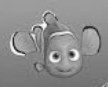



The Enlarged Image :-





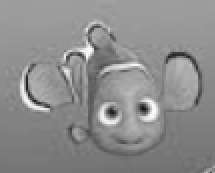

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


def apply_padding_2(input_array, mask_size):
    pad_size = mask_size // 2
    input_height, input_width = input_array.shape
    padded_height = input_height + 2 * pad_size
    padded_width = input_width + 2 * pad_size
    padded_array = np.zeros((padded_height, padded_width), dtype=input_array.dtype)
    padded_array[pad_size:pad_size+input_height, pad_size:pad_size+input_width] = input_array
    return padded_array

def zero_order_hold_convolution(input_array, factor=2):
    mask = np.array([[1,1],
                     [1,1]])
    input_height, input_width = input_array.shape
    zoom_height = factor * input_height -1
    zoom_width = factor * input_width -1
    output_array = np.zeros((zoom_height, zoom_width), dtype=np.float32)
    output_array[::2, ::2] = input_array
    print("\n\n The Original image Array with inserted Zeroes : - \n\n", output_array)
    conv_result = apply_padding_2(output_array, mask.shape[0])
    print("\n\n The Original image Array with padding : - \n\n", conv_result)
    buffer = np.zeros((zoom_height, zoom_width), dtype=np.float32)
    for i in range(conv_result.shape[0]-2):
        for j in range(conv_result.shape[1]-2):
              buffer[i, j] = np.sum(mask * conv_result[i:i+2, j:j+2])
    return buffer


image = cv2.imread('Nemo_sm.PNG', cv2.IMREAD_GRAYSCALE)
if image is not None:
    image_array = np.array(image)
    print("The Image Array\n ",image_array,'\n\n\n')
    convolved_image = (zero_order_hold_convolution(image_array, 2))
    print("\n\nThe Enlarged Image Array  :-  \n\n", convolved_image)
    print("\n\nThe Original Image :-\n\n\n")
    cv2_imshow(image)
    print("\n\nThe Enlarged Image :-\n\n\n")
    cv2_imshow(convolved_image)
else:
    print("Failed to load the image.")

<h1>First Order Hold Convolution</h1>

The Image Array
  [[157 157 157 ... 157 157 157]
 [157 157 157 ... 157 157 157]
 [157 157 157 ... 157 157 157]
 ...
 [116 116 117 ... 155 131 134]
 [116 116 116 ... 137 134 130]
 [115 115 115 ...  66 160 169]] 





 The Original image Array with inserted Zeroes : - 

 [[157.   0. 157. ... 157.   0. 157.]
 [  0.   0.   0. ...   0.   0.   0.]
 [157.   0. 157. ... 157.   0. 157.]
 ...
 [116.   0. 116. ... 134.   0. 130.]
 [  0.   0.   0. ...   0.   0.   0.]
 [115.   0. 115. ... 160.   0. 169.]]


 The Original image Array with padding : - 

 [[  0.   0.   0. ...   0.   0.   0.]
 [  0. 157.   0. ...   0. 157.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0. 115.   0. ...   0. 169.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


The Enlarged Image Array  :-  

 [[157.   157.   157.   ... 157.   157.   157.  ]
 [157.   157.   157.   ... 157.   157.   157.  ]
 [157.   157.   157.   ... 157.   157.   157.  ]
 ...
 [116.   116.   116.   ... 134.   132. 

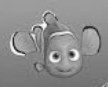



The Enlarged Image :-





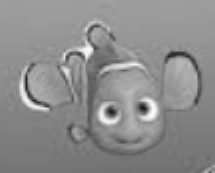

In [ ]:
import numpy as np
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def apply_padding(input_array, mask_size):
    if mask_size % 2 == 0:
        raise ValueError("Mask size must be an odd number.")
    pad_size = mask_size // 2
    input_height, input_width = input_array.shape
    padded_height = input_height + 2 * pad_size
    padded_width = input_width + 2 * pad_size
    padded_array = np.zeros((padded_height, padded_width), dtype=input_array.dtype)
    padded_array[pad_size:pad_size+input_height, pad_size:pad_size+input_width] = input_array
    return padded_array


def first_order_hold_convolution(input_array, factor=2, bands=1):
    mask = np.array([[1/4, 1/2, 1/4],
                     [1/2, 1, 1/2],
                     [1/4, 1/2, 1/4]])
    input_height, input_width = input_array.shape
    zoom_height = factor * input_height -1
    zoom_width = factor * input_width -1
    output_array = np.zeros((zoom_height, zoom_width), dtype=np.float32)
    output_array[::2, ::2] = input_array
    print("\n\n The Original image Array with inserted Zeroes : - \n\n", output_array)
    conv_result = apply_padding(output_array, mask.shape[0])
    print("\n\n The Original image Array with padding : - \n\n", conv_result)
    buffer = np.zeros((zoom_height, zoom_width), dtype=np.float32)
    for i in range(conv_result.shape[0]-2):
        for j in range(conv_result.shape[1]-2):
              buffer[i, j] = np.sum(mask * conv_result[i:i+3, j:j+3])
    return buffer


image = cv2.imread('Nemo_sm.PNG', cv2.IMREAD_GRAYSCALE)
if image is not None:
    image_array = np.array(image)
    print("The Image Array\n ",image_array,'\n\n\n')
    convolved_image = (first_order_hold_convolution(image_array, 2))
    print("\n\nThe Enlarged Image Array  :-  \n\n", convolved_image)
    print("\n\nThe Original Image :-\n\n\n")
    cv2_imshow(image)
    print("\n\nThe Enlarged Image :-\n\n\n")
    cv2_imshow(convolved_image)
else:
    print("Failed to load the image.")

<h1>Arbitrary Order Hold Convolution</h1>

[[157 157 157 ... 157 157 157]
 [157 157 157 ... 157 157 157]
 [157 157 157 ... 157 157 157]
 ...
 [116 116 117 ... 155 131 134]
 [116 116 116 ... 137 134 130]
 [115 115 115 ...  66 160 169]]
Original Image:-



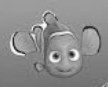

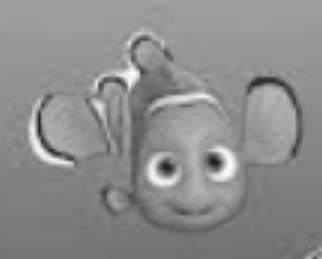

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


def Row_wise_interpolation(H,W,OG_image,interpolated_image,K_factor) :
  for i in range(H):
        for j in range(W - 1):

            #Assiging Adjacent Pixels
            Cpx = int(OG_image[i, j])      #P1
            Npx = int(OG_image[i, j + 1])  #P2

            #Subtracting
            diff = Npx- Cpx
            div = diff / K_factor

            # Interpolated Pizel Addtion Loop
            for k in range(K_factor):
                interpolated_value = int(Cpx + div * k)
                interpolated_image[i, j * K_factor + k] = interpolated_value

        interpolated_image[i, (W - 1) * K_factor] = OG_image[i, W - 1]
  return interpolated_image;


def Col_wise_interpolation(H,interpolated_W,interpolated_rows,interpolated_image) :
  #Interpolation of Columns
    for j in range(interpolated_W):
        for i in range(H - 1):

            #Assiging Adjacent Pixels
            Cpx = int(interpolated_rows[i, j]) #P1
            Npx = int(interpolated_rows[i + 1, j]) #P2

            #Subtracting
            diff = Npx - Cpx
            div= diff / K_factor

            # Interpolated Pizel Addtion Loop
            for k in range(K_factor):
                interpolated_value = int(Cpx + div * k)
                interpolated_image[i * K_factor + k, j] = interpolated_value


        interpolated_image[(H - 1) * K_factor, j] = interpolated_rows[H-1,j]

    return interpolated_image



def Arbitrary_Interpolation(OG_image, K_factor):
    #Calculating Height and Width of The imaghe
    H = len(OG_image)
    W = len(OG_image[0])

    #Interpolated_image_height_and_width
    interpolated_H = int((K_factor*(H-1)) +1)
    interpolated_W = int((K_factor*(W-1)) +1)

    #Np array buffer
    interpolated_image = np.zeros((interpolated_H, interpolated_W))



    interpolated_image = Row_wise_interpolation(H,W,OG_image, interpolated_image,K_factor)
    interpolated_rows = np.array(interpolated_image)
    interpolated_image = Col_wise_interpolation(H,interpolated_W,interpolated_rows,interpolated_image)


    return interpolated_image

#image loading
image = cv2.imread('Nemo_sm.PNG', cv2.IMREAD_GRAYSCALE)
if image is not None:
    image_array = np.array(image)
    OG_image= image_array
    print(OG_image)
    print("Original Image:-\n")
    cv2_imshow(image)
    #Assgin K factor
    K_factor = 3
    interpolated_image = Arbitrary_Interpolation(OG_image, K_factor)
    cv2_imshow(interpolated_image)
else:
    print("Failed to load the image.")